In [52]:
import pandas as pd
train_data = pd.read_csv(r"C:\Users\Admin\Downloads\train.csv")
test_data = pd.read_csv(r"C:\Users\Admin\Downloads\test (1).csv")


In [53]:
train_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [54]:
train_data

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [55]:
train_data.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [56]:
# Drop 'id' column
train_data = train_data.drop(columns=['id'])
test_ids = test_data['id']
test_data = test_data.drop(columns=['id'])

In [57]:
# Separate features and target
X = train_data.drop('loan_status', axis=1)
y = train_data['loan_status']


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [62]:

# Encode categorical features
from sklearn.preprocessing import LabelEncoder, StandardScaler
categorical_cols = X.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])
    if col in test_data.columns:
        test_data[col] = le.transform(test_data[col])

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.4+ MB


In [65]:

# Feature scaling (important for KNN & SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test_data)

In [66]:
# Split training data for validation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42)
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


Logistic Regression trained successfully.
KNN trained successfully.
Decision Tree trained successfully.
SVM trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
for name, model in models.items():
    y_pred = model.predict(X_val)
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
     



Logistic Regression Evaluation:
Accuracy: 0.9002
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     10087
           1       0.75      0.43      0.55      1642

    accuracy                           0.90     11729
   macro avg       0.83      0.70      0.74     11729
weighted avg       0.89      0.90      0.89     11729

Confusion Matrix:
[[9856  231]
 [ 939  703]]

KNN Evaluation:
Accuracy: 0.9238
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     10087
           1       0.79      0.63      0.70      1642

    accuracy                           0.92     11729
   macro avg       0.86      0.80      0.83     11729
weighted avg       0.92      0.92      0.92     11729

Confusion Matrix:
[[9808  279]
 [ 615 1027]]

Decision Tree Evaluation:
Accuracy: 0.9124
Classification Report:
              precision    recall  f1-score   support

    

In [43]:
import pandas as pd

# Save predictions for each model
for name, model in models.items():
    test_pred = model.predict(test_scaled)
    submission = pd.DataFrame({
        'id': test_ids,
        'loan_status': test_pred
    })
    submission.to_csv(f"C:\\Users\\Admin\\Downloads\\loan_predictions_{name.replace(' ', '_')}.csv", index=False)
    print(f"{name} predictions saved successfully!")


Logistic Regression predictions saved successfully!
KNN predictions saved successfully!
Decision Tree predictions saved successfully!
SVM predictions saved successfully!


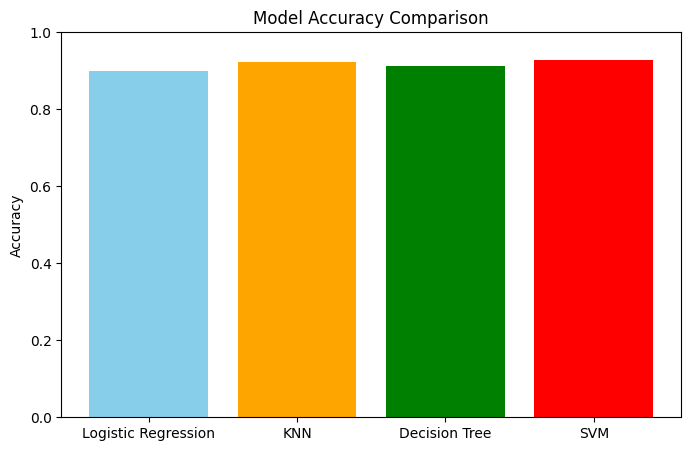

In [44]:
import matplotlib.pyplot as plt

# Calculate accuracies
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_val)
    accuracies[name] = accuracy_score(y_val, y_pred)

# Plot
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue','orange','green','red'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


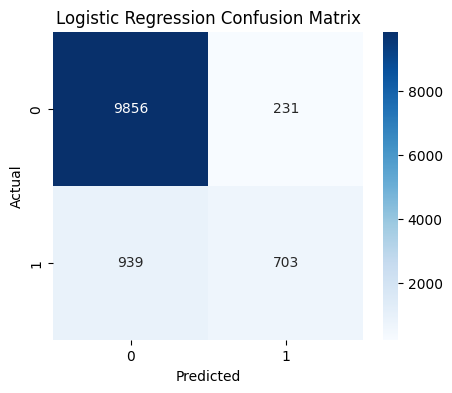

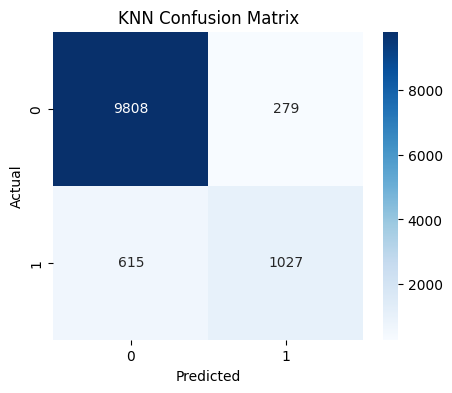

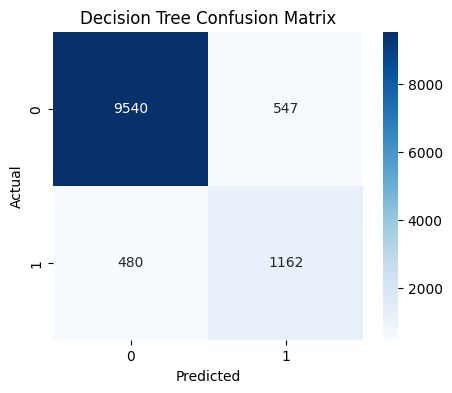

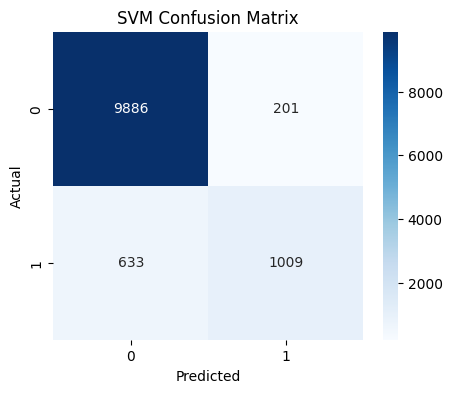

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_val)
    cm = confusion_matrix(y_val, y_pred)
    
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



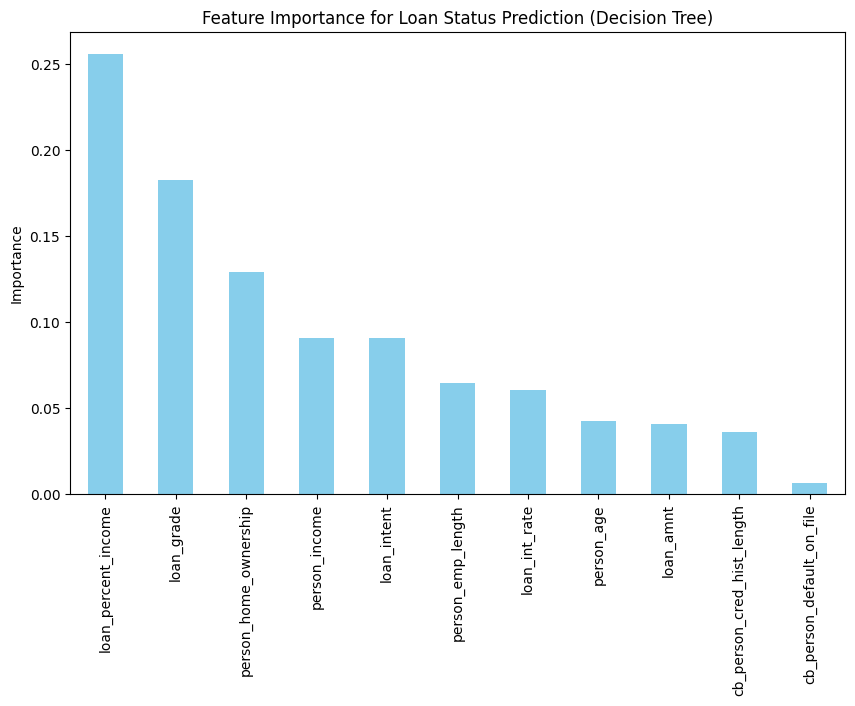

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# Using Decision Tree as example
dt_model = models['Decision Tree']

# Get feature importance
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance for Loan Status Prediction (Decision Tree)')
plt.ylabel('Importance')
plt.show()
